Pendiente (coeficiente): -0.6659087875417131
Intercepto: 17.452919540229885


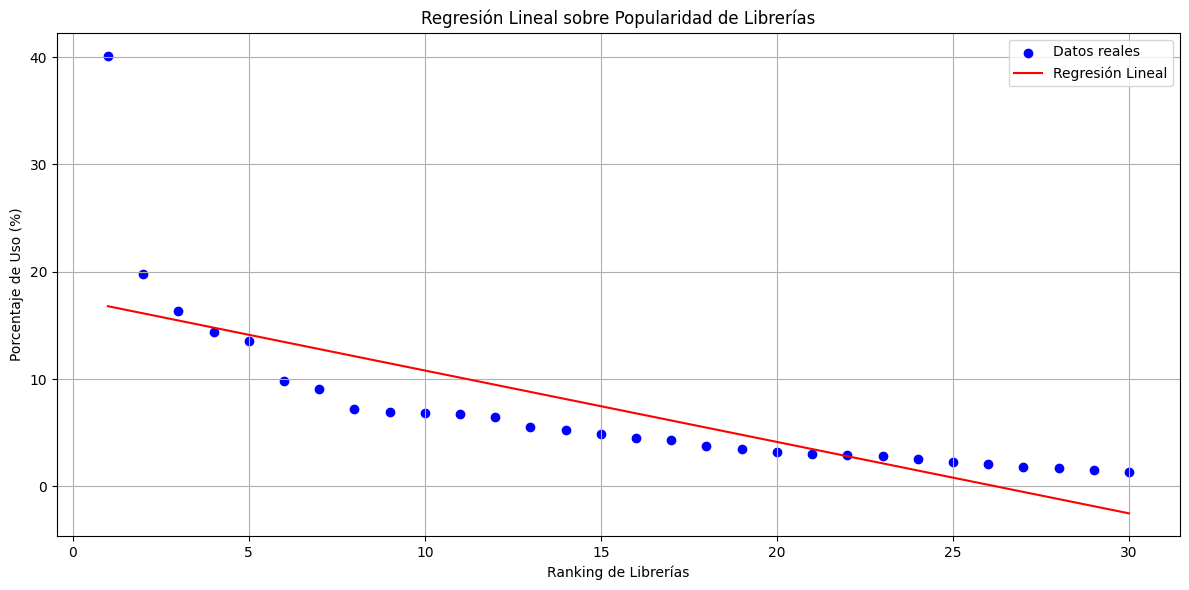

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el archivo CSV con los datos de librerías
archivo_csv = "Libreria.csv"  # Cambia esto a la ruta de tu archivo CSV
df = pd.read_csv(archivo_csv)

# Convertir la columna "Usage Percentage" a flotantes (removiendo el símbolo '%')
df["Usage Percentage"] = df["Usage Percentage"].str.rstrip('%').astype(float)

# Ordenar los datos por el porcentaje de uso de forma descendente
df = df.sort_values(by="Usage Percentage", ascending=False).reset_index(drop=True)

# Crear un índice ficticio como variable independiente (Ranking)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Usage Percentage)
X = df[["Ranking"]].values  # Variable independiente (Ranking)
y = df["Usage Percentage"].values  # Variable dependiente (Porcentaje de uso)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos reales y la regresión lineal
plt.figure(figsize=(12, 6))
plt.scatter(df["Ranking"], df["Usage Percentage"], color="blue", label="Datos reales")
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Ranking de Librerías")
plt.ylabel("Porcentaje de Uso (%)")
plt.title("Regresión Lineal sobre Popularidad de Librerías")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
